In [269]:
import scipy
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

df = pd.read_csv("football.csv")

In [270]:
df["Start Season"] = df["Season"].apply(lambda x : int(x[:4]))
df["End Season"] = df["Season"].apply(lambda x : (x[5:]))

In [271]:
def preprocessing(league):
    global df
    winners = df.query(f'(Rank == 1) & (League == "{league}")')[["Team", "Rank", "Start Season", "Points"]].reset_index(drop = True).sort_values(["Start Season"])
    runner_up = df.query(f'(Rank == 2) & (League == "{league}")')[["Team", "Rank", "Start Season", "Points"]].reset_index(drop = True).sort_values(["Start Season"])
    winners["Runner-up Points"] = runner_up.Points
    winners["Difference"] = winners["Points"] - winners["Runner-up Points"]
    winners.rename(columns={"Points" : "Winner Points"}, inplace = True)
    return winners.drop(["Team","Rank"], axis = 1)

In [272]:
pl = preprocessing("Premier League")
ll = preprocessing("La Liga")

In [273]:
pl

,Start Season,Winner Points,Runner-up Points,Difference
0,2009,86.0,85.0,1.0
1,2010,80.0,71.0,9.0
2,2011,89.0,89.0,0.0
3,2012,89.0,78.0,11.0
4,2013,86.0,84.0,2.0
5,2014,87.0,79.0,8.0
6,2015,81.0,71.0,10.0
7,2016,93.0,86.0,7.0
8,2017,100.0,81.0,19.0
9,2018,98.0,97.0,1.0


In [274]:
ll

,Start Season,Winner Points,Runner-up Points,Difference
0,2009,99.0,96.0,3.0
1,2010,96.0,92.0,4.0
2,2011,100.0,91.0,9.0
3,2012,100.0,85.0,15.0
4,2013,90.0,87.0,3.0
5,2014,94.0,92.0,2.0
6,2015,91.0,90.0,1.0
7,2016,93.0,90.0,3.0
8,2017,93.0,79.0,14.0
9,2018,87.0,76.0,11.0


In [294]:
pl.Difference.sum()

99.0

In [295]:
ll.Difference.sum()

85.0

In [275]:
pl.Difference.mean()

7.615384615384615

In [276]:
ll.Difference.mean()

6.538461538461538

???????

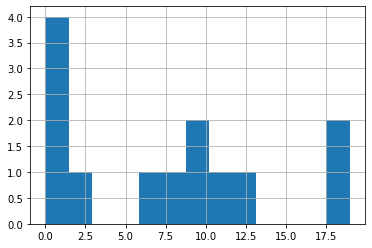

In [290]:
pl["Difference"].hist(bins = 13)
plt.show()

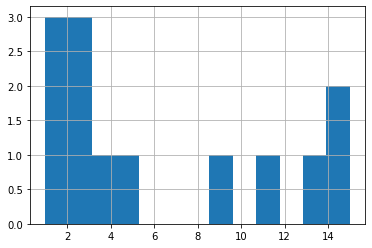

In [291]:
ll["Difference"].hist(bins = 13)
plt.show()

Normality

In [37]:
pg.normality(pl.Difference)

,W,pval,normal
Difference,0.902684,0.145568,True


In [38]:
pg.normality(ll.Difference)

,W,pval,normal
Difference,0.845968,0.02528,False


T-Test

In [279]:
pg.ttest(pl.Difference, ll.Difference, alternative = "greater",correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.472522,24,greater,0.320411,"[-2.82, inf]",0.185338,0.788,0.117903
